Libraries:

In [1]:
# Thêm các thư viện
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Importing data from: https://github.com/BoundlessWay/NMKHDL_FinalProject/blob/data_modeling/Data/number_of_deaths_processed_data.csv

In [2]:
# Lấy dữ liệu từ Data
url = "../../../Data/number_of_deaths_processed_data.csv"

# Đọc file 
deaths = pd.read_csv(url)
deaths

,Prematurity,Birth asphyxia and birth trauma,Sepsis and other infectious conditions of the newborn,Congenital anomalies,Injuries,Tuberculosis,Other Group 1 and Other noncommunicable (neonatal and under-5 only),HIV/AIDS,Diarrhoeal diseases,Tetanus,Measles,Meningitis/encephalitis,Malaria,Acute lower respiratory infections,CountryName,Year
0,19333.41926,11691.37210,4489.50404,1534.08344,371.28902,0.0,10579.92644,0.22891,1973.08786,2331.69796,0.0,1395.33839,0.0,6908.05259,Afghanistan,2000
1,14761.72219,10042.87869,2977.92908,1405.50824,130.32201,0.0,3849.14708,30.31433,724.01316,768.57928,0.0,357.27433,0.0,4267.31161,Angola,2000
2,351.16760,110.05251,17.54192,106.22332,4.31283,0.0,30.48989,0.00347,0.77210,0.09764,0.0,10.36631,0.0,36.97242,Albania,2000
3,3.00000,0.00000,0.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.00000,0.00000,0.0,0.00000,0.0,0.00000,Andorra,2000
4,137.90854,26.85080,2.86905,75.66284,1.78464,0.0,66.57905,0.10435,0.00000,0.00000,0.0,0.15043,0.0,0.09029,United Arab Emirates,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4263,17.45855,5.56010,2.93639,7.28102,0.25978,0.0,4.18806,0.00000,0.00000,0.00000,0.0,0.15554,0.0,1.16055,Samoa,2021
4264,11286.37393,6796.63328,1742.58956,2227.89226,229.08594,0.0,3051.97336,0.90444,521.35998,129.94279,0.0,44.07145,0.0,2523.17301,Yemen,2021
4265,4634.07215,2595.54661,1828.98610,1315.87236,166.21530,0.0,1708.85383,36.14888,0.00000,0.00000,0.0,16.01934,0.0,677.28544,South Africa,2021
4266,6920.62510,4054.12780,912.70245,1274.53105,35.09944,0.0,1776.66284,22.93804,134.08604,23.52546,0.0,108.91078,0.0,1228.79101,Zambia,2021


***PREDICT TỔNG SỐ CA TỬ VONG TOÀN CẦU***

Splitting features vs. labels:
- Label: Injuries - as in number of death caused by injuries
- Features: all other features

In [3]:
# X là DataFrame chứa các features sau khi loại bỏ cột Injuries
X = deaths.drop(columns = 'Injuries')

# Y chứa label Injuries
Y = deaths['Injuries']

# Cột CountryName thường không thể dùng trực tiếp trong mô hình máy học do giá trị chuỗi 
# nên được mã hóa sang dạng số sử dụng LabelEncoder từ thư viện sklearn
LE = LabelEncoder()
X['CountryName'] = LE.fit_transform(X['CountryName'])

Creating train, test set:

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .3, random_state = 42)

Initializing model:

In [5]:
# Xác định mô hình hồi quy tuyến tính 
LR = LinearRegression()

# Huấn luyện mô hình với dữ liệu huấn luyện đã chia
LR.fit(X_train, Y_train)

LinearRegression()

Predicting using the model:

In [6]:
# Dự đoán số ca tử vong toàn cầu
total_deaths_pred = LR.predict(X_test)

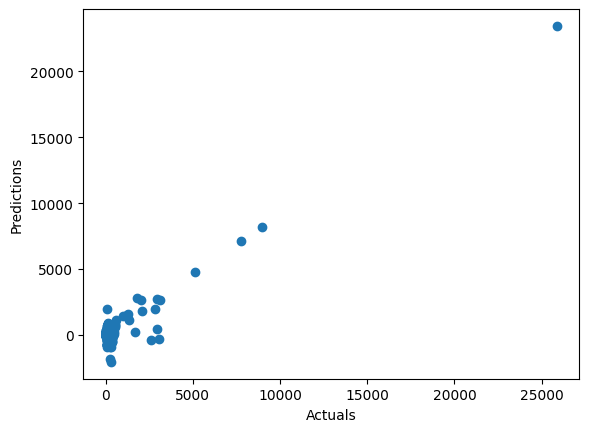

In [7]:
# Biểu đồ của số ca tử vong toàn cầu
plt.scatter(Y_test, total_deaths_pred)
plt.xlabel("Actuals")
plt.ylabel("Predictions")
plt.show()

Evaluation:

In [28]:
# @title
MSE = mean_squared_error(Y_test, total_deaths_pred)
MSE


61785.42950305886

***DỰ ĐOÁN SỐ CA TỬ VONG CHO TỪNG NGUYÊN NHÂN TRONG NHÓM CÁC NGUYÊN NHÂN CHO HỆ SỐ TƯƠNG QUAN CAO***

In [8]:
cleaned_df = pd.read_csv("../../../Data/number_of_deaths_processed_data.csv")
#cleaned_df
cleaned_df.dtypes

Prematurity                                                            float64
Birth asphyxia and birth trauma                                        float64
Sepsis and other infectious conditions of the newborn                  float64
Congenital anomalies                                                   float64
Injuries                                                               float64
Tuberculosis                                                           float64
Other Group 1 and Other noncommunicable (neonatal and under-5 only)    float64
HIV/AIDS                                                               float64
Diarrhoeal diseases                                                    float64
Tetanus                                                                float64
Measles                                                                float64
Meningitis/encephalitis                                                float64
Malaria                                             

In [9]:
df_copy = cleaned_df.copy()
df_copy = df_copy.drop(['Year', 'CountryName'], axis='columns')
df_copy.dtypes

Prematurity                                                            float64
Birth asphyxia and birth trauma                                        float64
Sepsis and other infectious conditions of the newborn                  float64
Congenital anomalies                                                   float64
Injuries                                                               float64
Tuberculosis                                                           float64
Other Group 1 and Other noncommunicable (neonatal and under-5 only)    float64
HIV/AIDS                                                               float64
Diarrhoeal diseases                                                    float64
Tetanus                                                                float64
Measles                                                                float64
Meningitis/encephalitis                                                float64
Malaria                                             

In [10]:
# Tính ma trận tương quan
correlation_matrix = df_copy.corr()
print(correlation_matrix)

                                                    Prematurity   
Prematurity                                            1.000000  \
Birth asphyxia and birth trauma                        0.965735   
Sepsis and other infectious conditions of the n...     0.859655   
Congenital anomalies                                   0.938366   
Injuries                                               0.381441   
Tuberculosis                                                NaN   
Other Group 1 and Other noncommunicable (neonat...     0.987657   
HIV/AIDS                                               0.384231   
Diarrhoeal diseases                                    0.910967   
Tetanus                                                0.825879   
Measles                                                     NaN   
Meningitis/encephalitis                                0.779090   
Malaria                                                0.009048   
Acute lower respiratory infections                     0.90316

Tìm các cặp tương quan

In [25]:
# Thiết đặt ngưỡng tương quan
threshold = 0.7

# Liệt kê các cặp có tỷ lệ tương quan vượt ngưỡng
high_correlation = (correlation_matrix.abs() > threshold) & (correlation_matrix != 1)
#print(high_correlation)
couple = {}

for col in high_correlation:
    correlated_cols = correlation_matrix.index[high_correlation[col]].tolist()
    if len(correlated_cols) > 0:
        couple[col] = correlated_cols
        
print(couple)

{'Prematurity': ['Birth asphyxia and birth trauma', 'Sepsis and other infectious conditions of the newborn', 'Congenital anomalies', 'Other Group 1 and Other noncommunicable (neonatal and under-5 only)', 'Diarrhoeal diseases', 'Tetanus', 'Meningitis/encephalitis', 'Acute lower respiratory infections'], 'Birth asphyxia and birth trauma': ['Prematurity', 'Sepsis and other infectious conditions of the newborn', 'Congenital anomalies', 'Other Group 1 and Other noncommunicable (neonatal and under-5 only)', 'Diarrhoeal diseases', 'Tetanus', 'Meningitis/encephalitis', 'Acute lower respiratory infections'], 'Sepsis and other infectious conditions of the newborn': ['Prematurity', 'Birth asphyxia and birth trauma', 'Congenital anomalies', 'Other Group 1 and Other noncommunicable (neonatal and under-5 only)', 'Diarrhoeal diseases', 'Tetanus', 'Meningitis/encephalitis', 'Acute lower respiratory infections'], 'Congenital anomalies': ['Prematurity', 'Birth asphyxia and birth trauma', 'Sepsis and oth

Build mô hình

In [44]:
for target_col, feature_cols in couple.items():
    # Tạo DataFrame mới chỉ chứa các cột của cặp đã chọn
    selected_df = cleaned_df[[target_col] + feature_cols]

    # Loại bỏ các dòng có giá trị null (nếu có)
    selected_df.dropna(inplace=True)

    # Chia dữ liệu thành features (X) và target (y)
    X_couple = selected_df[feature_cols]
    y_couple = selected_df[target_col]

    # Chia dữ liệu thành train và test set
    X_couple_train, X_couple_test, y_couple_train, y_couple_test = train_test_split(X_couple, y_couple, test_size=0.2, random_state=42)

    # Khởi tạo và huấn luyện mô hình Linear Regression
    model = LinearRegression()
    model.fit(X_couple_train, y_couple_train)

    # Đánh giá mô hình
    train_score = model.score(X_couple_train, y_couple_train)
    test_score = model.score(X_couple_test, y_couple_test)

    print(f"Target Column: {target_col}")
    print(f"Features: {', '.join(feature_cols)}")
    print(f"Train Score: {train_score}")
    print(f"Test Score: {test_score}")
    print("-----------------------")


Target Column: Prematurity
Features: Birth asphyxia and birth trauma, Sepsis and other infectious conditions of the newborn, Congenital anomalies, Other Group 1 and Other noncommunicable (neonatal and under-5 only), Diarrhoeal diseases, Tetanus, Meningitis/encephalitis, Acute lower respiratory infections
Train Score: 0.9967997147393624
Test Score: 0.9889813691739641
-----------------------
Target Column: Birth asphyxia and birth trauma
Features: Prematurity, Sepsis and other infectious conditions of the newborn, Congenital anomalies, Other Group 1 and Other noncommunicable (neonatal and under-5 only), Diarrhoeal diseases, Tetanus, Meningitis/encephalitis, Acute lower respiratory infections
Train Score: 0.9971936292515062
Test Score: 0.989820597073897
-----------------------
Target Column: Sepsis and other infectious conditions of the newborn
Features: Prematurity, Birth asphyxia and birth trauma, Congenital anomalies, Other Group 1 and Other noncommunicable (neonatal and under-5 only),

C:\Users\teoca\AppData\Local\Temp\ipykernel_1020\1546940108.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df.dropna(inplace=True)
C:\Users\teoca\AppData\Local\Temp\ipykernel_1020\1546940108.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df.dropna(inplace=True)
C:\Users\teoca\AppData\Local\Temp\ipykernel_1020\1546940108.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df.dropna(inplace=True)
C:\U

Dự đoán số ca tử vong

In [45]:
for target_col, feature_cols in couple.items():
    # Tạo DataFrame mới chỉ chứa các cột của cặp đã chọn
    selected_df = cleaned_df[[target_col] + feature_cols]

    # Loại bỏ các dòng có giá trị null (nếu có)
    selected_df.dropna(inplace=True)

    # Chia dữ liệu thành features (X) và target (y)
    X_couple = selected_df[feature_cols]
    y_couple = selected_df[target_col]

    # Chia dữ liệu thành train và test set
    X_couple_train, X_couple_test, y_couple_train, y_couple_test = train_test_split(X_couple, y_couple, test_size=0.2, random_state=42)

    # Khởi tạo và huấn luyện mô hình Linear Regression
    model = LinearRegression()
    model.fit(X_couple_train, y_couple_train)
    
    # Dự đoán số ca tử vong
    predicted_values = model.predict(X_couple_test)
    print("Predictions:")
    print(predicted_values)
    print("-----------------------")

Predictions:
[ 14156.47785585    536.05386639   7732.3892873     579.96785934
    558.77487502    763.12692961    781.28187857    758.13765443
    578.61142986    703.9915705    1147.24629485   1164.75901941
    647.95268904   1531.45334819    543.39544752   2724.23611219
    505.92051232    509.74016385    531.57168761   1025.6162488
   1370.89097771    494.16823529    543.90115976   2429.16137485
    570.68630893    584.9316909    3995.48852028    561.27564499
   2105.61429969    489.97549161    499.03495125    734.42997517
   1776.68182562    624.16398667    676.90947514   2481.88773366
   2533.81802639    712.92296937  11495.23862123    503.29346777
   1677.48472745    492.29220431   2325.00967107   5245.44166249
    581.83173314   8503.26340145   5515.08978973    494.29404736
    538.25960476    491.39989484  10016.79976427    499.56800956
   1978.55011389    563.14612665    742.21610069   1012.3982865
    898.85337303    786.2290231     547.16287866   1686.80619408
   4319.874315

C:\Users\teoca\AppData\Local\Temp\ipykernel_1020\1685503323.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df.dropna(inplace=True)
C:\Users\teoca\AppData\Local\Temp\ipykernel_1020\1685503323.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df.dropna(inplace=True)
C:\Users\teoca\AppData\Local\Temp\ipykernel_1020\1685503323.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df.dropna(inplace=True)
C:\U

Vẽ biểu đồ

C:\Users\teoca\AppData\Local\Temp\ipykernel_1020\3456082746.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df.dropna(inplace=True)


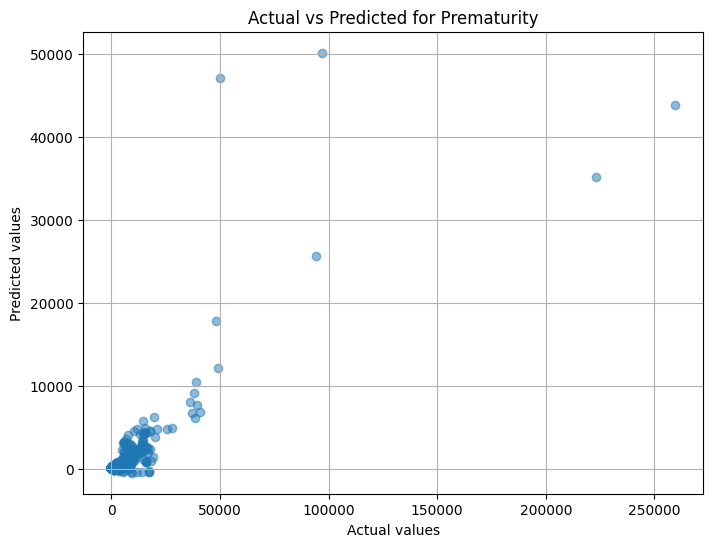

C:\Users\teoca\AppData\Local\Temp\ipykernel_1020\3456082746.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df.dropna(inplace=True)


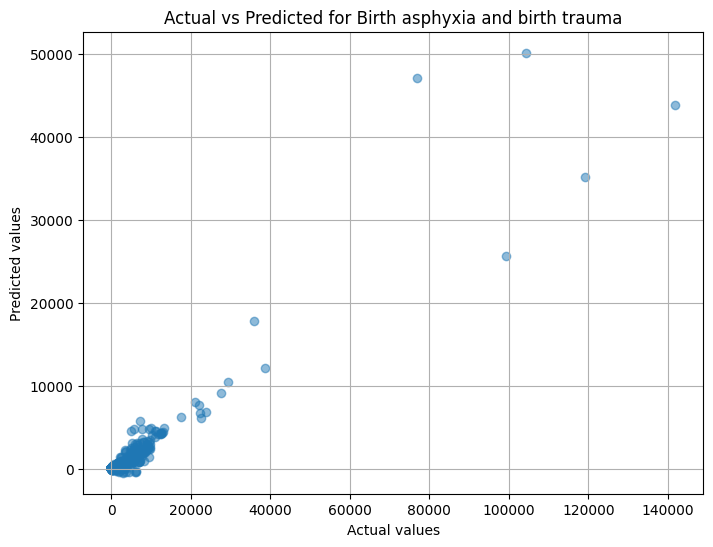

C:\Users\teoca\AppData\Local\Temp\ipykernel_1020\3456082746.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df.dropna(inplace=True)


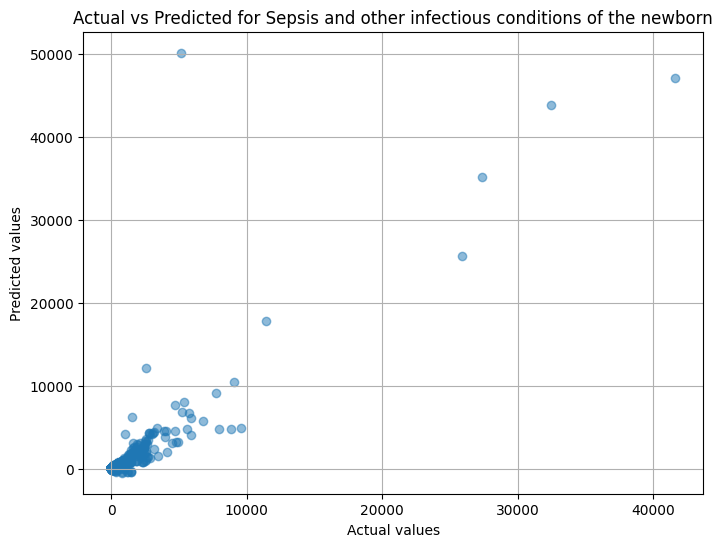

C:\Users\teoca\AppData\Local\Temp\ipykernel_1020\3456082746.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df.dropna(inplace=True)


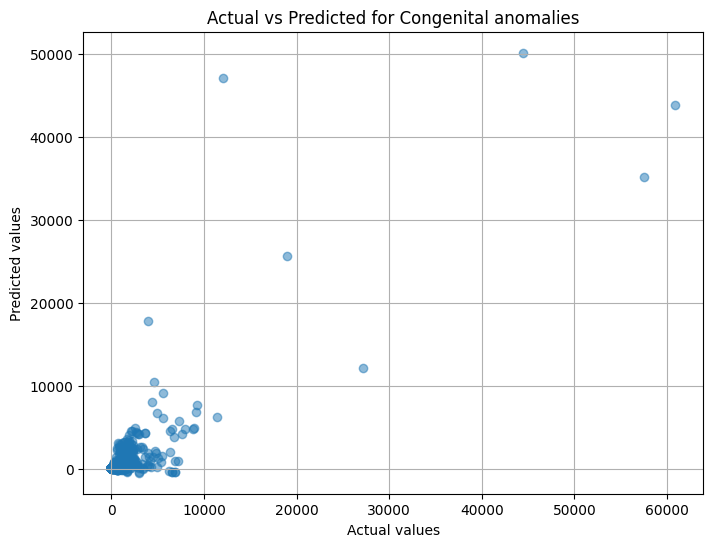

C:\Users\teoca\AppData\Local\Temp\ipykernel_1020\3456082746.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df.dropna(inplace=True)


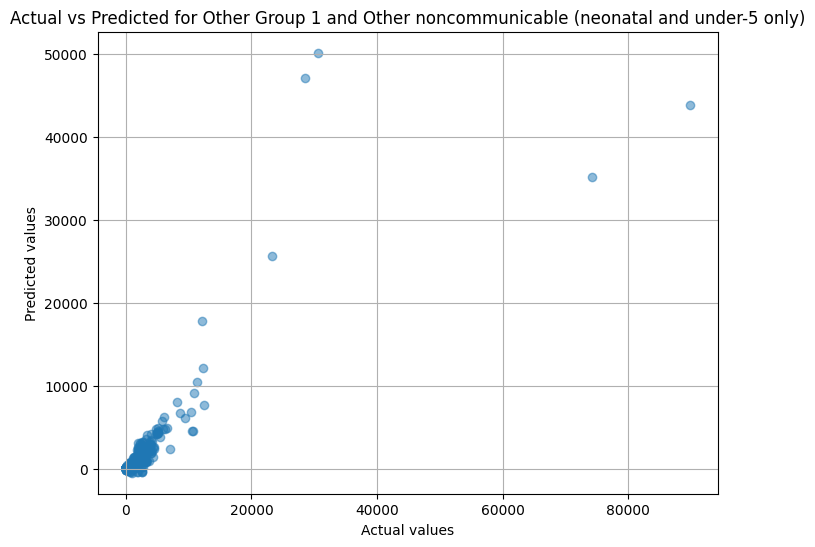

C:\Users\teoca\AppData\Local\Temp\ipykernel_1020\3456082746.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df.dropna(inplace=True)


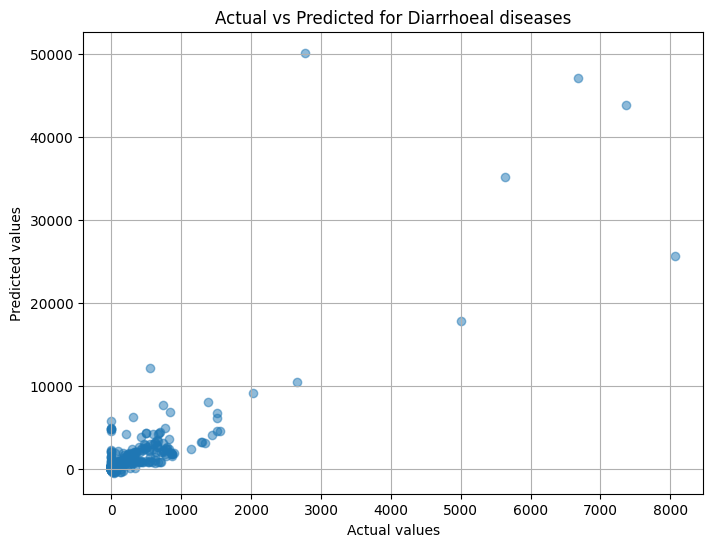

C:\Users\teoca\AppData\Local\Temp\ipykernel_1020\3456082746.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df.dropna(inplace=True)


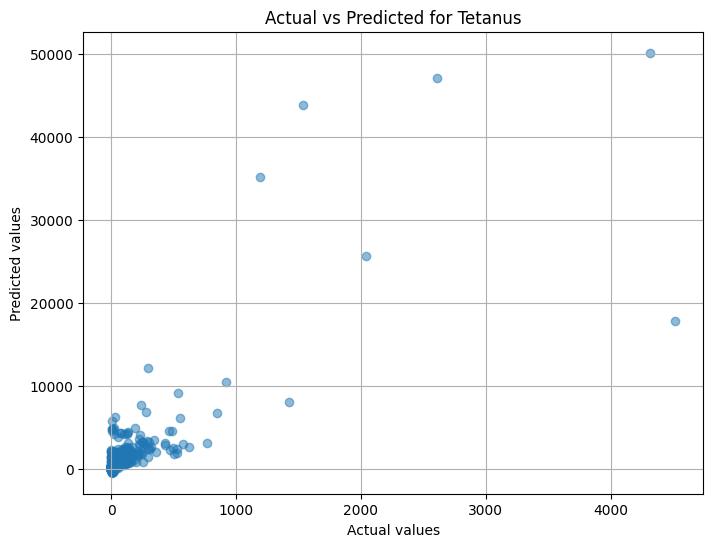

C:\Users\teoca\AppData\Local\Temp\ipykernel_1020\3456082746.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df.dropna(inplace=True)


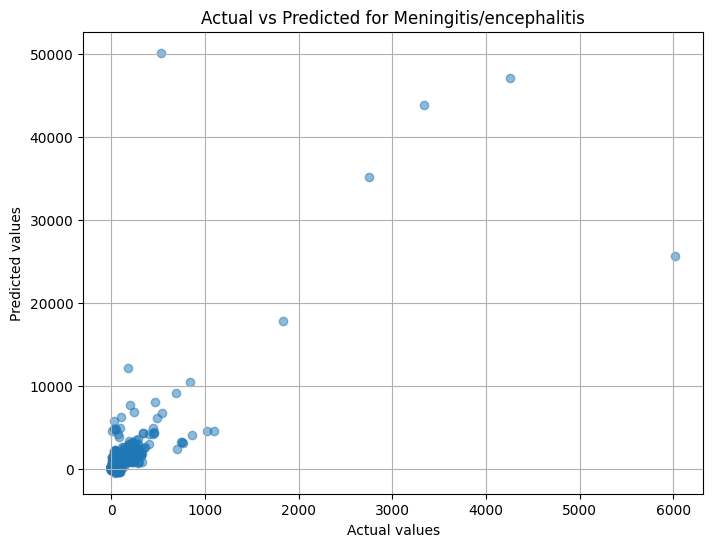

C:\Users\teoca\AppData\Local\Temp\ipykernel_1020\3456082746.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df.dropna(inplace=True)


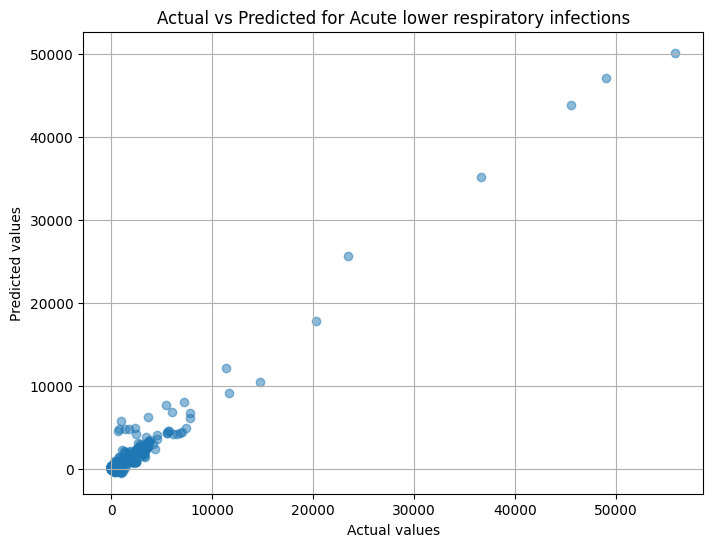

In [43]:
for target_col, feature_cols in couple.items():
    # Tạo DataFrame mới chỉ chứa các cột của cặp đã chọn
    selected_df = cleaned_df[[target_col] + feature_cols]

    # Loại bỏ các dòng có giá trị null (nếu có)
    selected_df.dropna(inplace=True)

    # Chia dữ liệu thành features (X) và target (y)
    X_couple = selected_df[feature_cols]
    y_couple = selected_df[target_col]

    # Chia dữ liệu thành train và test set
    X_couple_train, X_couple_test, y_couple_train, y_couple_test = train_test_split(X_couple, y_couple, test_size=0.2, random_state=42)
     
    # Vẽ biểu đồ
    plt.figure(figsize=(8, 6))
    plt.scatter(y_couple_test, predicted_values, alpha=0.5)
    plt.title(f"Actual vs Predicted for {target_col}")
    plt.xlabel("Actual values")
    plt.ylabel("Predicted values")
    plt.grid(True)
    plt.show()